U.S. Inflation: The Price We Pay for Change 💰🔥

Inflation is the silent force that makes your coffee cost more each year. It measures how prices rise over time, affecting everything from groceries to rent. Too high? It erodes your paycheck. Too low? The economy slows down. Policymakers, investors, and everyday consumers keep a close eye on it because inflation shapes interest rates, wages, and financial markets.

Your dataset? A snapshot of history—telling the story of how prices moved across decades.
The dataset contains monthly U.S. inflation rate(over 40 years starting from 1950) data from a source named Mishkin (possibly referencing economist Frederic Mishkin, who has worked on inflation and monetary policy).
https://github.com/lachlandeer/hayashir/blob/master/data-raw/mishkin.csv

# 📌 End-To-End Steps for Hourly Bandwidth Usage  Forecasting
1️⃣ Load & Explore Data – Import the Hourly Bandwidth Usage dataset, preprocess, and visualize trends.

2️⃣ Train-Test Split – Properly split the time series (no shuffling!).

3️⃣ Analyze – Examine time series patterns 

4️⃣ Achieve Stationarity – Apply differencing and conduct the ADF test.

5️⃣ Baseline Models – Compare against simple models (historical mean & last-value predictions).

6️⃣ Fit ARMA Model –

- Select lag order and train an ARMA(q) model.
- 
- Obtain model summary & diagnostics 📊
  
7️⃣ Evaluate Performance –

- Use dynamic forecasting on test data.
- Perform inverse differencing to revert transformations.
- Compare accuracy using MAE & other metrics.
  
8️⃣ Forecast Future Data –

- Generate dynamic forecasts 📈
- Perform inverse differencing to restore scale.
- Predict Hourly Bandwidth Usage 🔮

In [ ]:
# 📌 End-To-End Steps for Hourly Bandwidth Usage  Forecasting
1️⃣ Load & Explore Data – Import the Hourly Bandwidth Usage dataset, preprocess, and visualize trends.

2️⃣ Train-Test Split – Properly split the time series (no shuffling!).

3️⃣ Analyze – Examine time series patterns 

4️⃣ Achieve Stationarity – Apply differencing and conduct the ADF test.

5️⃣ Baseline Models – Compare against simple models (historical mean & last-value predictions).

6️⃣ Fit ARMA Model –

- Select lag order and train an ARMA(q) model.
- 
- Obtain model summary & diagnostics 📊
  
7️⃣ Evaluate Performance –

- Use dynamic forecasting on test data.
- Perform inverse differencing to revert transformations.
- Compare accuracy using MAE & other metrics.
  
8️⃣ Forecast Future Data –

- Generate dynamic forecasts 📈
- Perform inverse differencing to restore scale.
- Predict Hourly Bandwidth Usage 🔮

# 🔹 Step 1: Import Libraries & Load Data

In [3]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller


In [5]:

# Load dataset

df = pd.read_csv('data/bandwidth.csv')



# Display first few rows
df.head()

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


In [6]:
# # Combine 'year' and 'month' to create a datetime column
# df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# # Set the datetime column as the index
# df.set_index('date', inplace=True)
# # Drop 'year' and 'month' columns from the DataFrame
# df.drop(columns=['year', 'month'], inplace=True)

# # Display the updated DataFrame
# df.head()

In [7]:
df.isna().sum()

hourly_bandwidth    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hourly_bandwidth  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


# 🔹 Step 2: Data Analysis And Visualization

## 📌 Plot the US Inflation  Data

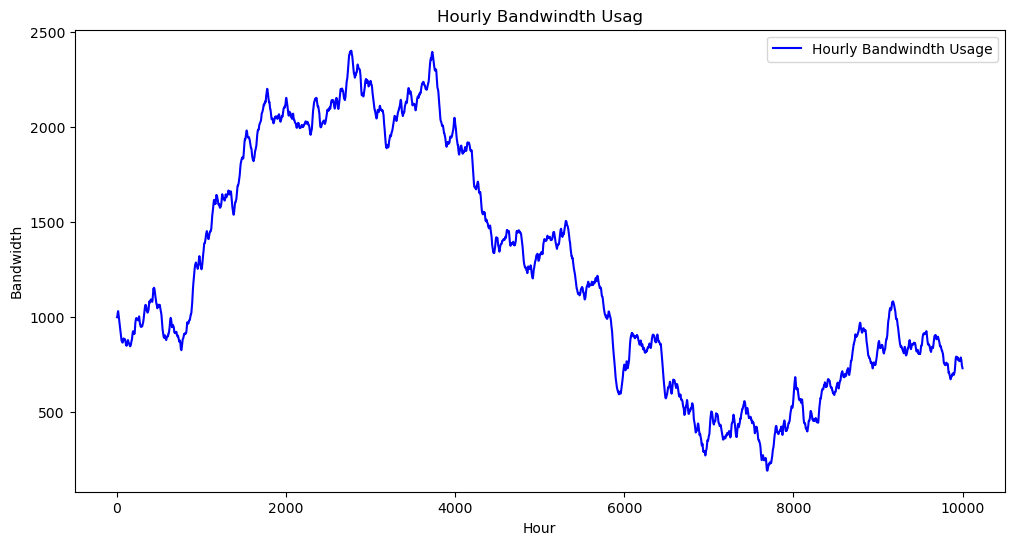

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df, label="Hourly Bandwindth Usage", color='blue')
plt.title("Hourly Bandwindth Usag")
plt.xlabel("Hour")
plt.ylabel("Bandwidth")
plt.legend()
plt.show()

## Check for Stationarity (Dickey-Fuller Test)

## Rolling Statistics

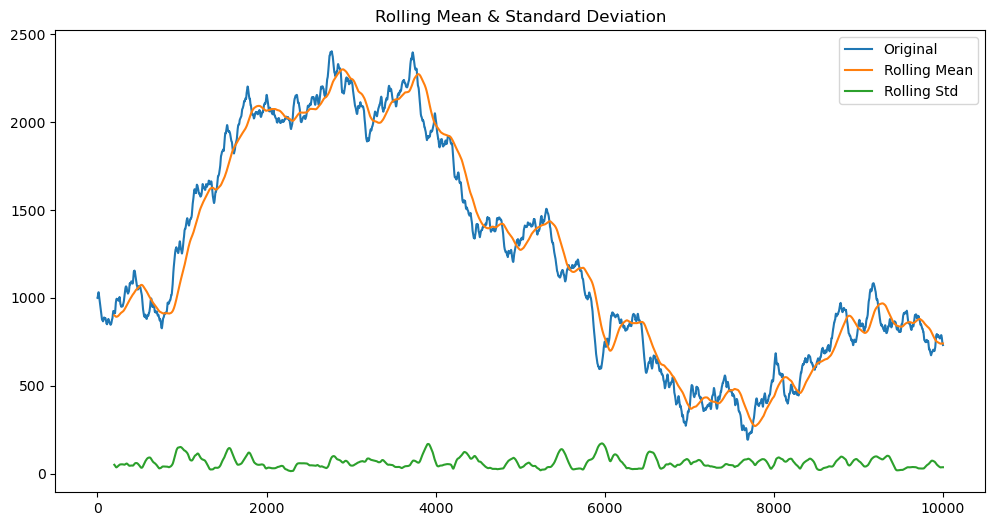

In [12]:
plt.figure(figsize=(12,6))

#Determing rolling statistics
rolmean = df.rolling(window=200).mean()
rolstd = df.rolling(window=200).std()

#Plot rolling statistics:
orig = plt.plot(df, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### ADF Test

In [13]:
# ADF Test
def adf_test(series, alpha=0.05):
    """
    Performs the Augmented Dickey-Fuller (ADF) test on a time series.

    Parameters:
    - series (pd.Series): The time series data to test.
    - alpha (float): Significance level (default is 0.05).

    Returns:
    - None (prints the results)
    """
    result = adfuller(series, autolag='AIC')

    # Create results dictionary
    output = {
        'Test Statistic': result[0],
        'p-value': result[1],
        '# Lags Used': result[2],
        'Number of Observations': result[3],
    }

    # Add critical values
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value

    # Convert to DataFrame for better readability
    output_df = pd.DataFrame(output.items(), columns=['Metric', 'Value'])

    # Print the results
    print("\n🔍 Results of Augmented Dickey-Fuller Test:")
    print(output_df.to_string(index=False))

    # Interpretation
    print("\n📌 Interpretation:")
    if result[1] <= alpha:
        print(f"✅ The time series is **stationary** (p-value = {result[1]:.5f} ≤ {alpha})")
    else:
        print(f"❌ The time series is **not stationary** (p-value = {result[1]:.5f} > {alpha})")

In [14]:
adf_test(df['hourly_bandwidth'])


🔍 Results of Augmented Dickey-Fuller Test:
                Metric       Value
        Test Statistic   -0.871465
               p-value    0.797224
           # Lags Used    6.000000
Number of Observations 9993.000000
   Critical Value (1%)   -3.431005
   Critical Value (5%)   -2.861829
  Critical Value (10%)   -2.566924

📌 Interpretation:
❌ The time series is **not stationary** (p-value = 0.79722 > 0.05)


📌 Interpretation:
✅ The time series is **non- stationary** (p-value = 0.11809279841865472 >= 0.05)

# 🔹 Step 3: Train-Test Split

In [15]:

train_size = int(len(df) * 0.9)  # 90% training, 10% testing
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"Training Size: {len(train)} months")
print(f"Test Size: {len(test)} months")

Training Size: 9000 months
Test Size: 1000 months


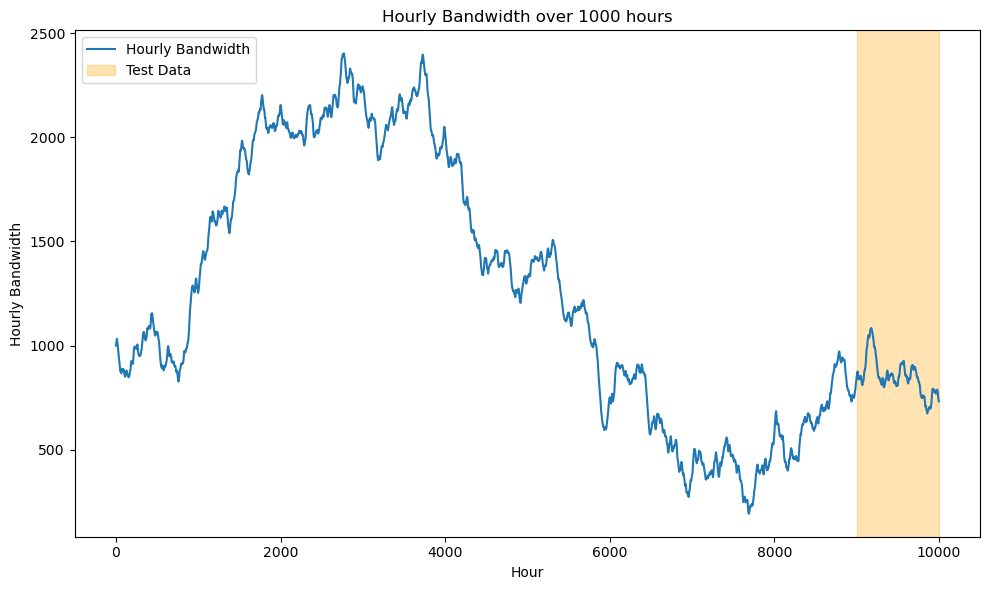

In [17]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['hourly_bandwidth'], label='Hourly Bandwidth')

# Highlight the period corresponding to the test data
plt.axvspan(train.index[-1], df.index[-1], color='orange', alpha=0.3, label='Test Data')

# Add labels, title, and show legend
plt.xlabel('Hour')
plt.ylabel('Hourly Bandwidth')
plt.title('Hourly Bandwidth over 1000 hours')
plt.legend()

plt.tight_layout()
plt.show()

# 🔹 Step 4:Create Baseline Models - Historic Mean, Last Value

## Historic Mean

In [18]:
historical_mean=np.mean(train['hourly_bandwidth'])

In [19]:
test = test.copy() 
test.loc[:, 'pred_mean'] = historical_mean
test

,hourly_bandwidth,pred_mean
9000,848.353097,1275.050242
9001,853.879556,1275.050242
9002,859.662415,1275.050242
9003,863.162335,1275.050242
9004,865.454674,1275.050242
...,...,...
9995,740.546059,1275.050242
9996,738.906228,1275.050242
9997,736.057995,1275.050242
9998,733.559640,1275.050242


## Create Last Known Value


In [20]:
last = train['hourly_bandwidth'].iloc[-1]
last

843.823606340762

In [21]:
test.loc[:, 'pred_last'] = last
test

,hourly_bandwidth,pred_mean,pred_last
9000,848.353097,1275.050242,843.823606
9001,853.879556,1275.050242,843.823606
9002,859.662415,1275.050242,843.823606
9003,863.162335,1275.050242,843.823606
9004,865.454674,1275.050242,843.823606
...,...,...,...
9995,740.546059,1275.050242,843.823606
9996,738.906228,1275.050242,843.823606
9997,736.057995,1275.050242,843.823606
9998,733.559640,1275.050242,843.823606


In [22]:
# Calculate MAE for pred_mean
mae_mean = mean_absolute_error(test["hourly_bandwidth"], test["pred_mean"])

# Calculate MAE for pred_last
mae_last = mean_absolute_error(test["hourly_bandwidth"], test["pred_last"])

# Print results
print(f"MAE for pred_mean: {mae_mean:.3f}")
print(f"MAE for pred_last: {mae_last:.3f}")

MAE for pred_mean: 424.158
MAE for pred_last: 62.828


# 🔹 Step 5:Create MA Model

## Elimination of Non Stationarity

In [24]:

# create a differenced series
def trend_difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)


In [25]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [26]:
# Apply differencing on just one column, assuming 'inflation' is the column of interest
differenced_series = trend_difference(df['hourly_bandwidth'].values, interval=1)

In [28]:


# Convert to DataFrame
df_diff = pd.DataFrame({'hourly_bandwidth': differenced_series})

# Show the first few rows
print(df_diff.head())

   hourly_bandwidth
0          0.472694
1          1.076611
2          2.656099
3          2.745698
4          2.246164


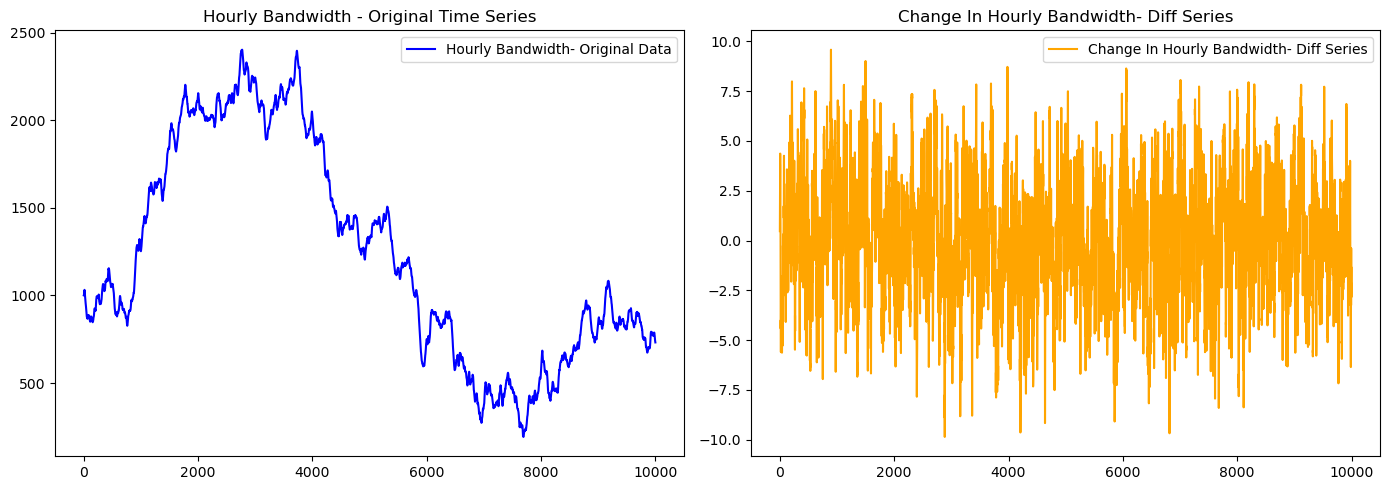

In [31]:
# plot before and after series
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original series
axes[0].plot(df, label='Hourly Bandwidth- Original Data', color='blue')
axes[0].set_title('Hourly Bandwidth - Original Time Series')
axes[0].legend()

# Diff transformed series
axes[1].plot(df_diff, label="Change In Hourly Bandwidth- Diff Series", color='orange')
axes[1].set_title('Change In Hourly Bandwidth- Diff Series')
axes[1].legend()

plt.tight_layout()
plt.show()

In [32]:
adf_test(df_diff, alpha=0.05)


🔍 Results of Augmented Dickey-Fuller Test:
                Metric       Value
        Test Statistic  -20.694854
               p-value    0.000000
           # Lags Used    5.000000
Number of Observations 9993.000000
   Critical Value (1%)   -3.431005
   Critical Value (5%)   -2.861829
  Critical Value (10%)   -2.566924

📌 Interpretation:
✅ The time series is **stationary** (p-value = 0.00000 ≤ 0.05)


## Determine Lag Order (q)

## ACF and PACF Plots


In [39]:
# ACF and PACF function to plot both Autocorrelation and Partial Autocorrelation
def ACF_and_PACF(data):
    # Create a figure with a specific size (12x9 inches)
    fig = plt.figure(figsize=(12,9))

    # Add subplot for ACF (Autocorrelation Function)
    ax1 = fig.add_subplot(211)  # The '211' means 2 rows, 1 column, and 1st subplot.
    fig = plot_acf(data, lags=40, ax=ax1)  # Plot the ACF with 40 lags (number of time lags to display).

    # Add subplot for PACF (Partial Autocorrelation Function)
    ax2 = fig.add_subplot(212)  # The '212' means 2 rows, 1 column, and 2nd subplot.
    fig = plot_pacf(data, lags=40, ax=ax2)  # Plot the PACF with 40 lags (number of time lags to display).



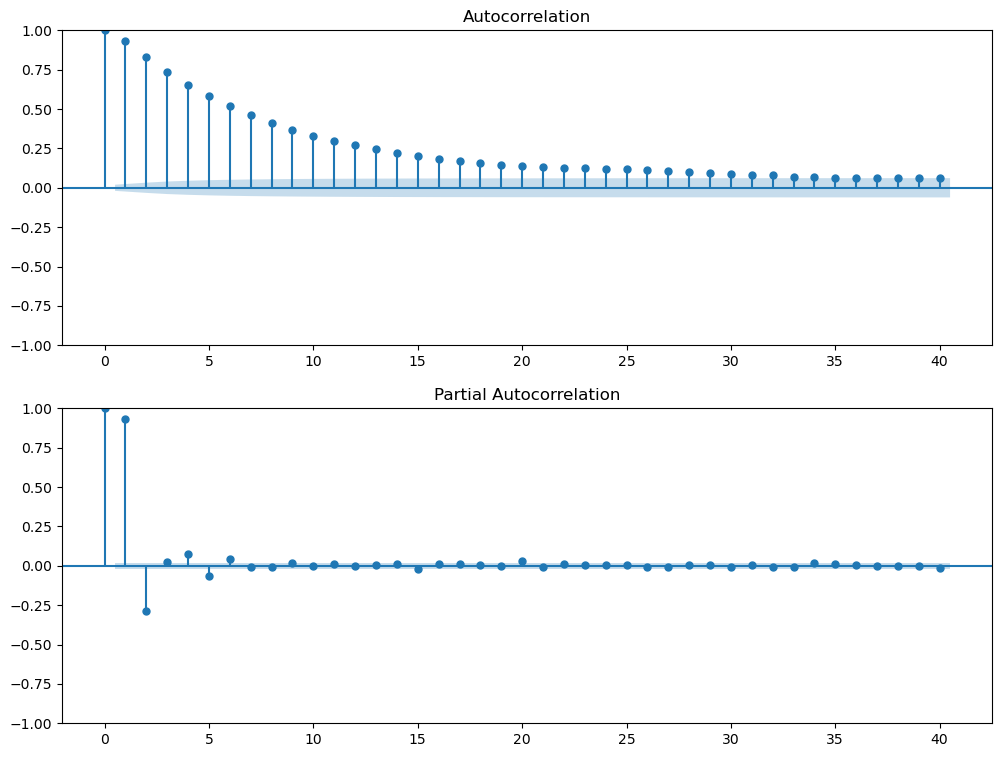

In [40]:
# Call the ACF_and_PACF function for the transformed train data
ACF_and_PACF(df_diff)

In [42]:
from tqdm import tqdm
import pandas as pd
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

def optimize_arima(endog, order_list, d):
    results = []
    
    for order in tqdm(order_list, desc="Optimizing ARIMA models"):
        try:
            # Fit ARIMA model
            model = ARIMA(
                endog, 
                order=(order[0], 0, order[1])
            ).fit()
        except Exception as e:
            print(f"Model {order} failed with error: {e}")
            continue
        
        # Collect AIC for the model
        aic = model.aic
        results.append([order, aic])
        
    # If no valid models were found
    if not results:
        print("No valid models were found.")
        return pd.DataFrame()
    
    # Create a DataFrame with results
    result_df = pd.DataFrame(results, columns=['(p, q)', 'AIC'])
    
    # Sort in ascending order based on AIC
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df


In [43]:
# from itertools import product

p_range = range(0, 5, 1)
q_range = range(0, 5, 1)
d = 1

myorder_list = list(product(p_range, q_range))

In [44]:
# Ensure the function name is correct
result_df = optimize_arima(df_diff, myorder_list, d)
result_df

Optimizing ARIMA models:   4%|▍         | 1/25 [00:01<00:26,  1.09s/it]C:\Users\agaan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
Optimizing ARIMA models:   8%|▊         | 2/25 [00:01<00:19,  1.17it/s]C:\Users\agaan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
Optimizing ARIMA models:  12%|█▏        | 3/25 [00:03<00:22,  1.04s/it]C:\Users\agaan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
Optimizing ARIMA models:  16%|█▌        | 4/25 [00:05<00:29,  1.43s/it]C:\Users\agaan

,"(p, q)",AIC
0,"(3, 2)",28453.189466
1,"(2, 3)",28453.366131
2,"(2, 2)",28453.664598
3,"(4, 2)",28454.747511
4,"(2, 4)",28455.183865
5,"(4, 3)",28455.372795
6,"(3, 3)",28455.396110
7,"(1, 4)",28456.092203
8,"(4, 4)",28456.674951
9,"(3, 4)",28457.326255


## Split Differenced Series - Change in US Inflation

In [45]:
train_diff = df_diff[:int(0.9*len(df_diff))]
test_diff = df_diff[int(0.9*len(df_diff)):]

print(len(train_diff))
print(len(test_diff))

8999
1000


In [46]:
train_diff.head()

,hourly_bandwidth
0,0.472694
1,1.076611
2,2.656099
3,2.745698
4,2.246164


# 🔹 Step 5: Train AR Model

In [47]:
# Fit MA model
q = 3
model_fit = ARIMA(train_diff, order=(3,0,2)).fit()

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")



In [48]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       hourly_bandwidth   No. Observations:                 8999
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -12836.127
Date:                Sat, 15 Feb 2025   AIC                          25686.255
Time:                        14:18:15   BIC                          25735.989
Sample:                             0   HQIC                         25703.178
                               - 8999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0125      0.132     -0.094      0.925      -0.271       0.246
ar.L1          0.3564      0.055      6.480      0.000       0.249       0.464
ar.L2          0.4246      0.069      6.125      0.0

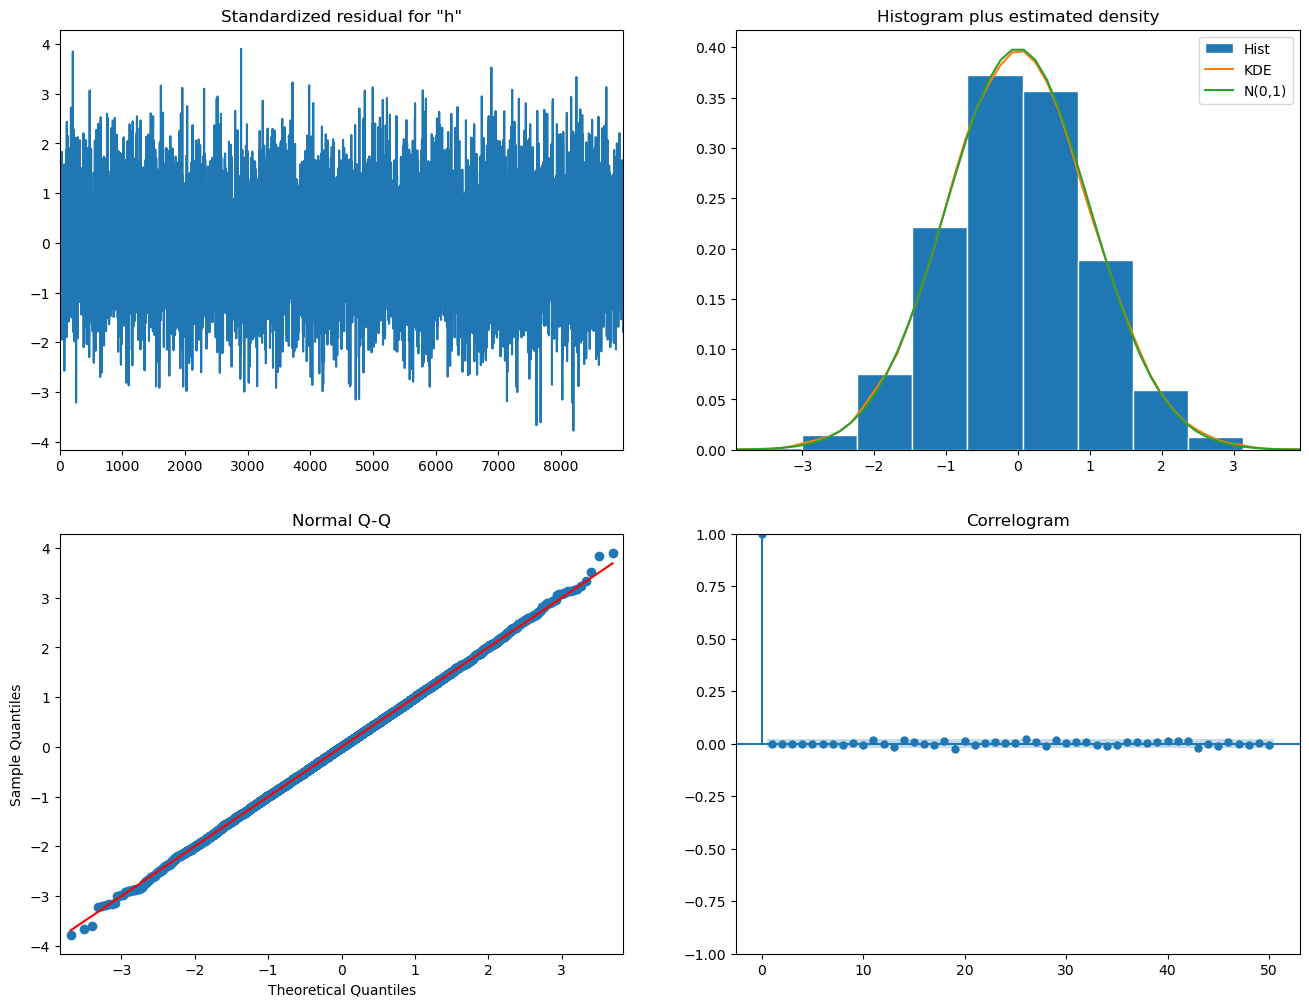

In [49]:
model_fit.plot_diagnostics(lags=50, figsize=(16,12))
plt.show()

# 🔹 Step 6: Model Evaluation
.



## 🔹 (A) Evaluate Model on Train Data(In sample data)


## 📌 One-Step-Ahead Forecast

## 🔹  Evaluate Model on Test Data

In [50]:
# start_index = len(train_diff)
# end_index = len(train_diff)
# forecast = model_fit.predict(start=start_index, end=end_index)

forecast_test = model_fit.get_prediction(start=len(train), end=len(train)+len(test)-1,dynamic=False)


In [51]:
forecast_mean_test=forecast_test.predicted_mean.to_frame()

# Manually assign test index
forecast_mean_test.index = test.index  # Ensure it matches the test set
forecast_mean_test

,predicted_mean
9000,3.477077
9001,3.004802
9002,2.709619
9003,2.392189
9004,2.132966
...,...
9995,-0.012460
9996,-0.012460
9997,-0.012460
9998,-0.012460


In [235]:
# forecast_mean_test.info()

In [236]:
# test

### Inverse Differencing

In [237]:
# train_diff

In [52]:
print(f"Length of forecast: {len(forecast_mean_test)}")
print(f"Length of test data: {len(test)}")

Length of forecast: 1000
Length of test data: 1000


In [54]:
# invert the differenced forecast


# Initialize an empty list to store the inverted forecasted values

inverted_forecasts = []
history = [x for x in train['hourly_bandwidth']]

# Loop over forecasted values and invert them
for yhat in forecast_mean_test['predicted_mean']:
    inverted = inverse_difference(history, yhat, 1)
    inverted_forecasts.append(inverted)
    history.append(inverted)


# print(f"Length of inverted_forecasts: {len(inverted_forecasts)}")
# print(f"Length of test index: {len(test.index)}")

# Convert to Pandas Series and align index with test data
inverted_forecasts = pd.Series(inverted_forecasts, index=test.index)


inverted_forecasts
   

9000    847.300683
9001    850.305486
9002    853.015105
9003    855.407294
9004    857.540260
           ...    
9995    862.423167
9996    862.410707
9997    862.398247
9998    862.385787
9999    862.373327
Length: 1000, dtype: float64

In [55]:
# # Calculate MAE
mae_os_test = mean_absolute_error(test['hourly_bandwidth'], inverted_forecasts)
print(f"Test Data (Dynamic) MAE: {mae_os_test:.3f}")

Test Data (Dynamic) MAE: 66.600


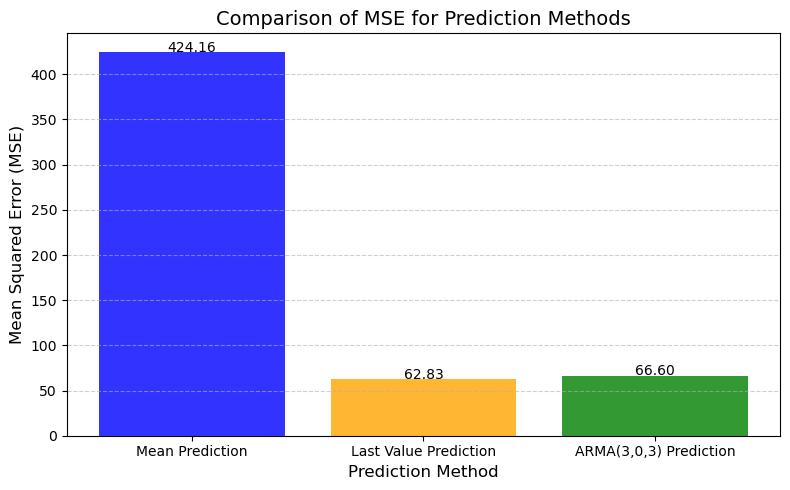

In [56]:
# Store in a list
mae_values = [mae_mean, mae_last, mae_os_test]

methods = ['Mean Prediction', 'Last Value Prediction', 'ARMA(3,0,3) Prediction']

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(methods, mae_values, color=['blue', 'orange', 'green'], alpha=0.8)

# Add value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', fontsize=10)

# Set labels and title
ax.set_xlabel('Prediction Method', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax.set_title('Comparison of MSE for Prediction Methods', fontsize=14)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

 # 🔹 Step 7: Forecast Future Inflation - Next 24 Months

In [63]:
forecast_24hrs = model_fit.forecast(steps=1024)
forecast_24hrs

8999     3.743250
9000     3.477077
9001     3.004802
9002     2.709619
9003     2.392189
           ...   
10018   -0.012460
10019   -0.012460
10020   -0.012460
10021   -0.012460
10022   -0.012460
Name: predicted_mean, Length: 1024, dtype: float64

In [64]:

last_train_index = train.index[-1]  # Last date in training data

# Generate future timestamps for 17 quarters ahead
future_dates = pd.date_range(start=last_train_index, periods=1024, freq='H')[1:]  # Exclude last train date

# Convert forecasted values into a Pandas Series with the new index
forecast_series = pd.Series(forecast_24hrs.values, index=future_dates)
forecast_series

ValueError: Length of values (1024) does not match length of index (1023)

In [260]:
# month=1
# # Initialize history from the train + test data (so that forecast can continue seamlessly)
# history = [x for x in train['inflation_1']] + [x for x in test['inflation_1']]

# # Initialize an empty list to store the inverted forecasted values
# inverted_forecasts = []

# # Loop for forecasting the next 7 days beyond the test set
# for _ in range(74):
#     # Use the model to predict the next step (forecast one step ahead)
#     yhat = model_fit.forecast(steps=1)  # Assuming the model is already fit and can forecast 1 step ahead
    
#     # Inverse the differencing to get the actual forecasted value
#     inverted = inverse_difference(history, yhat, 1)
    
#     # Print and append the forecasted value to the list
#     print('Month %d: %f' % (month, inverted))
#     inverted_forecasts.append(inverted)
    
#     # Append the inverted value to history to update it for the next forecast
#     history.append(inverted)
    
#     # Increment the day for the next forecast
#     month += 1


# Initialize an empty list to store the inverted forecasted values

inverted_forecasts = []
history = [x for x in train['inflation_1']]

# Loop over forecasted values and invert them
for yhat in forecast_mean_test['predicted_mean']:
    inverted = inverse_difference(history, yhat, 1)
    inverted_forecasts.append(inverted)
    history.append(inverted)


# print(f"Length of inverted_forecasts: {len(inverted_forecasts)}")
# print(f"Length of test index: {len(test.index)}")

# Convert to Pandas Series and align index with test data
inverted_forecasts = pd.Series(inverted_forecasts, index=test.index)


inverted_forecasts
   

date
1986-11-01    1.523703
1986-12-01    1.828220
1987-01-01    1.917931
1987-02-01    1.911165
1987-03-01    1.904399
1987-04-01    1.897634
1987-05-01    1.890868
1987-06-01    1.884102
1987-07-01    1.877337
1987-08-01    1.870571
1987-09-01    1.863806
1987-10-01    1.857040
1987-11-01    1.850274
1987-12-01    1.843509
1988-01-01    1.836743
1988-02-01    1.829977
1988-03-01    1.823212
1988-04-01    1.816446
1988-05-01    1.809681
1988-06-01    1.802915
1988-07-01    1.796149
1988-08-01    1.789384
1988-09-01    1.782618
1988-10-01    1.775853
1988-11-01    1.769087
1988-12-01    1.762321
1989-01-01    1.755556
1989-02-01    1.748790
1989-03-01    1.742024
1989-04-01    1.735259
1989-05-01    1.728493
1989-06-01    1.721728
1989-07-01    1.714962
1989-08-01    1.708196
1989-09-01    1.701431
1989-10-01    1.694665
1989-11-01    1.687899
1989-12-01    1.681134
1990-01-01    1.674368
1990-02-01    1.667603
1990-03-01    1.660837
1990-04-01    1.654071
1990-05-01    1.647306
1990-0

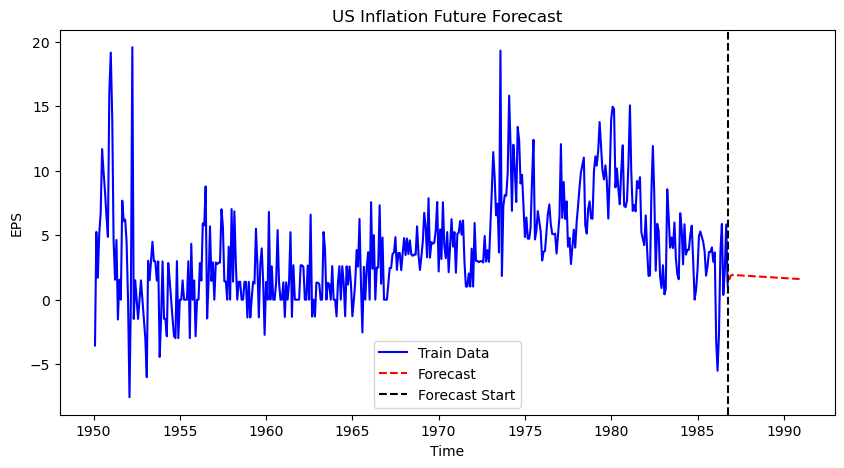

In [262]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(train, label="Train Data", color='blue')
plt.plot(inverted_forecasts, label="Forecast", color='red', linestyle='dashed')
plt.axvline(x=last_train_index, color='black', linestyle='--', label="Forecast Start")
plt.legend()
plt.xlabel("Time")
plt.ylabel("EPS")
plt.title("US Inflation Future Forecast")
plt.show()

To forecast future values without including test data:

Use only your training data to train the model.
When making predictions for the future, use the model's forecasts iteratively, adding each prediction to the history for the next forecast.